* Created By: Blessy Louis (2348416) 4MDS'B'
* Created On : 15.07.2024

## **Lab Exercise 3:**
* Traversal and Pathfinding: Implement BFS and DFS. Apply Dijkstra's algorithm to find shortest paths on a transportation or routing dataset**


## **Domain: Transportation and Logistics**

##**Data Description**
# **Souce:**https://www.kaggle.com/code/sasakitetsuya/indian-cities-network-analysis/input

This CSV file contains three features: Origin city, Destination city and Distance between them (via road). It can be used for a wide range of path/route-finding programs.

* Origin: This column specifies the origin (start) city.
* Destination: This column specifies the destination (final) city.
* Distance: This column contains round off distance (in km) between the Origin and Destination cities.

**Import Libraries**



The `import pandas as pd` statement imports the Pandas library under the alias `pd`, allowing Python code to use Pandas functions and classes. Pandas is a powerful data manipulation and analysis library in Python, providing data structures like DataFrame and Series for handling structured data efficiently.

`import networkx as nx` imports the NetworkX library under the alias `nx`. NetworkX is a Python package for the creation, manipulation, and study of complex networks of nodes and edges. It offers tools for analyzing network structures, computing network properties, and performing graph algorithms.

`import matplotlib.pyplot as plt` imports the Pyplot module from the Matplotlib library under the alias `plt`. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Pyplot provides a MATLAB-like plotting interface, making it easy to generate various types of plots such as line plots, histograms, scatter plots, etc.

`from collections import deque` imports the `deque` class from the built-in `collections` module. `deque` is a double-ended queue implementation that supports fast appends and pops from both ends. It is useful for implementing queues and breadth-first search algorithms efficiently.

`import heapq` imports the `heapq` module, which provides an implementation of the heap queue algorithm, also known as the priority queue algorithm. Heaps are binary trees for which every parent node has a value less than or equal to any of its children. `heapq` provides functions for creating heaps, adding and removing elements, and efficiently retrieving the smallest elements in a heap, making it useful for implementing algorithms like Dijkstra's algorithm.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import heapq

**Load dataset**

In [2]:
# Load the dataset
df = pd.read_csv('indian-cities-dataset.csv')
print(df.head())


      Origin Destination  Distance
0       Agra       Delhi       240
1       Agra     Lucknow       334
2       Agra      Kanpur       277
3  Ahmedabad      Mumbai       526
4  Ahmedabad        Pune       663


In [3]:
df['Origin'].unique()

array(['Agra', 'Ahmedabad', 'Bengaluru', 'Bhubaneswar', 'Chennai',
       'Delhi', 'Goa', 'Hyderabad', 'Jaipur', 'Kanpur', 'Kochi',
       'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Pune', 'Udaipur',
       'Varanasi', 'Vishakhapatnam'], dtype=object)

In [4]:
df['Destination'].unique()

array(['Delhi', 'Lucknow', 'Kanpur', 'Mumbai', 'Pune', 'Jaipur',
       'Udaipur', 'Hyderabad', 'Chennai', 'Goa', 'Kolkata',
       'Vishakhapatnam', 'Patna', 'Bengaluru', 'Kochi', 'Agra',
       'Thiruvananthapuram', 'Ahmedabad', 'Varanasi', 'Bhubaneswar'],
      dtype=object)

Creating Graph

In [5]:
# Create a graph from the dataset
graph = nx.DiGraph()

for _, row in df.iterrows():
    origin = row['Origin']
    destination = row['Destination']
    distance = row['Distance']
    graph.add_edge(origin, destination, weight=distance)



1. **Graph Initialization**:
   - `graph = nx.DiGraph()`: This line initializes an empty directed graph object using NetworkX. A directed graph (DiGraph) means that the edges have a direction, i.e., they go from one node (city) to another in a specified direction.

2. **Iterating Over the Dataset**:
   - `for _, row in df.iterrows()`: This loop iterates over each row in the DataFrame `df`. The DataFrame `df` is assumed to contain at least three columns: 'Origin', 'Destination', and 'Distance'. Each row represents a connection between two cities with a specific distance.

3. **Extracting Data from Each Row**:
   - `origin = row['Origin']`: This line extracts the origin city from the current row.
   - `destination = row['Destination']`: This line extracts the destination city from the current row.
   - `distance = row['Distance']`: This line extracts the distance between the origin and destination cities from the current row.

4. **Adding Edges to the Graph**:
   - `graph.add_edge(origin, destination, weight=distance)`: This line adds an edge to the directed graph with the origin city as the starting node and the destination city as the ending node. The distance between these cities is added as an edge attribute named 'weight'. In a directed graph, the direction of the edge matters, meaning the connection from the origin to the destination does not imply a connection in the reverse direction.

### Resulting Graph

- **Nodes**: Each unique city listed in the 'Origin' and 'Destination' columns of the dataset becomes a node in the graph.
- **Edges**: Each connection between cities, as specified in each row of the dataset, becomes a directed edge in the graph. The direction of the edge goes from the 'Origin' city to the 'Destination' city.
- **Edge Weights**: Each edge has a weight attribute that represents the distance between the two connected cities.

This graph structure allows for the application of various graph algorithms, such as BFS, DFS, and Dijkstra's algorithm, to find paths and shortest distances between cities.

Visualize the graph

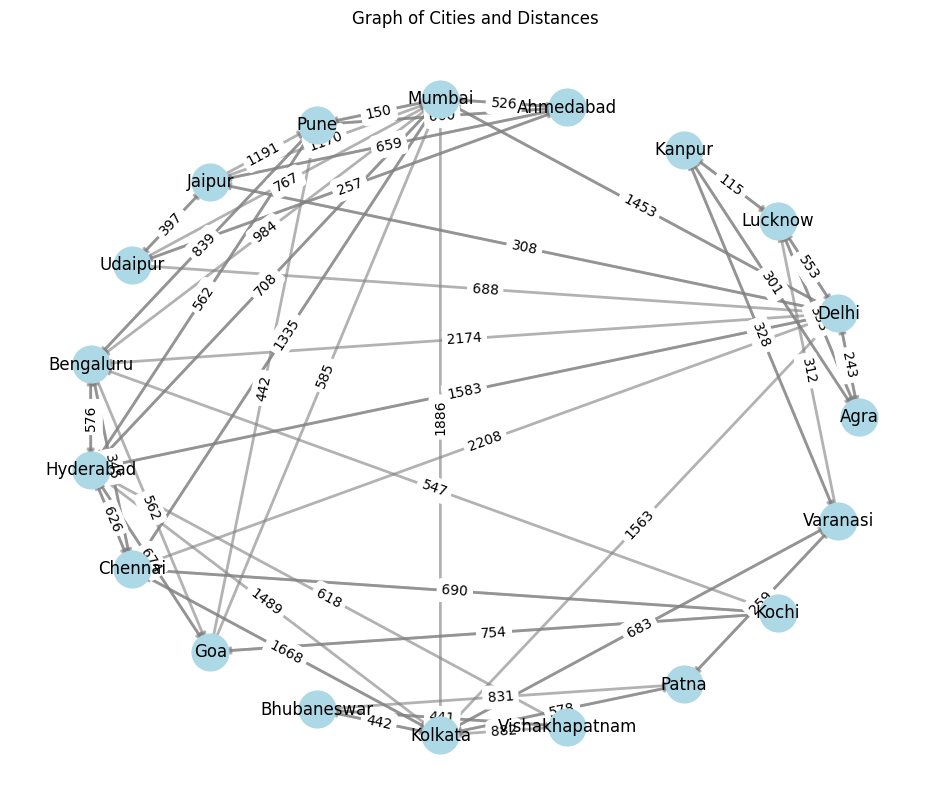

In [18]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load dataset from CSV
file_path = 'cities_distances.csv'  # Replace with your actual file path
df = pd.read_csv('/content/indian-cities-dataset.csv')

# Define cities
cities = [
    'Agra', 'Ahmedabad', 'Bengaluru', 'Bhubaneswar', 'Chennai',
    'Delhi', 'Goa', 'Hyderabad', 'Jaipur', 'Kanpur', 'Kochi',
    'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Pune', 'Udaipur',
    'Varanasi', 'Vishakhapatnam'
]

# Create a directed graph
graph = nx.DiGraph()

# Add edges from the dataset
for _, row in df.iterrows():
    origin = row['Origin']
    destination = row['Destination']
    distance = row['Distance']

    if origin in cities and destination in cities:
        graph.add_edge(origin, destination, weight=distance)

# Draw the graph
plt.figure(figsize=(12, 10))

# Custom positions for cities for better visualization
pos = nx.circular_layout(graph)

# Draw nodes
nx.draw_networkx_nodes(graph, pos, node_size=700, node_color='lightblue')

# Draw edges
nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(), width=2, alpha=0.6, edge_color='gray')

# Draw labels and edge labels
nx.draw_networkx_labels(graph, pos, font_size=12, font_family='sans-serif')
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

plt.title('Graph of Cities and Distances')
plt.axis('off')  # Turn off axis numbers
plt.show()


**BFS** **DFS** **Dijkstra's Algorithm**


Menu:
1. Perform BFS
2. Perform DFS
3. Perform Dijkstra's Algorithm
4. Exit and Visualize
Enter your choice (1-4): 1
Enter starting city: Chennai
Enter destination city: Pune
BFS path: ['Chennai', 'Hyderabad', 'Pune']

Menu:
1. Perform BFS
2. Perform DFS
3. Perform Dijkstra's Algorithm
4. Exit and Visualize
Enter your choice (1-4): 2
Enter starting city: Chennai
Enter destination city: Pune
DFS path: ['Chennai', 'Kolkata', 'Delhi', 'Hyderabad', 'Pune']

Menu:
1. Perform BFS
2. Perform DFS
3. Perform Dijkstra's Algorithm
4. Exit and Visualize
Enter your choice (1-4): 3
Enter starting city: Chennai
Enter destination city: Pune
Dijkstra's shortest path: ['Chennai', 'Bengaluru', 'Pune']
Shortest distance: 1184

Menu:
1. Perform BFS
2. Perform DFS
3. Perform Dijkstra's Algorithm
4. Exit and Visualize
Enter your choice (1-4): 4
Exiting program and visualizing results.


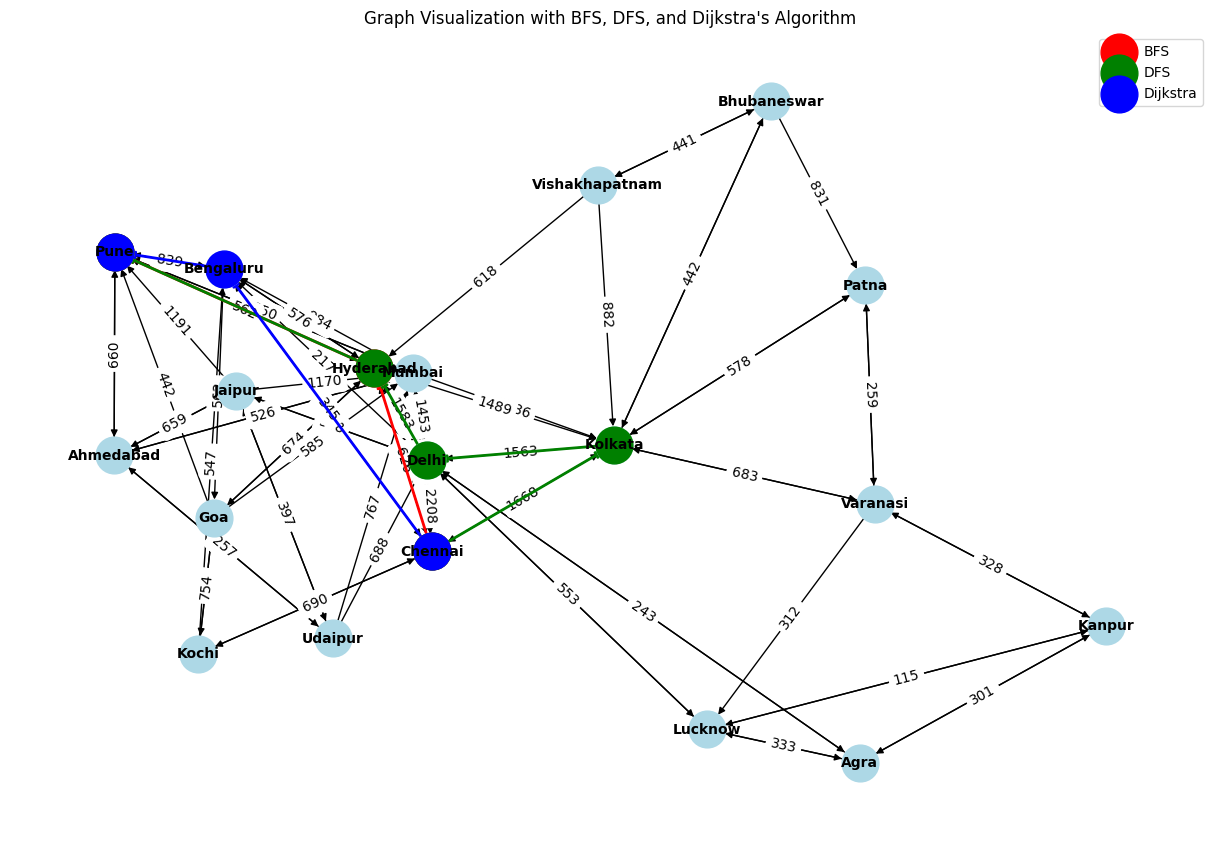

In [16]:


# Define cities
cities = [
    'Agra', 'Ahmedabad', 'Bengaluru', 'Bhubaneswar', 'Chennai',
    'Delhi', 'Goa', 'Hyderabad', 'Jaipur', 'Kanpur', 'Kochi',
    'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Pune', 'Udaipur',
    'Varanasi', 'Vishakhapatnam'
]

# Create a directed graph
graph = nx.DiGraph()

# Add edges from the dataset
for _, row in df.iterrows():
    origin = row['Origin']
    destination = row['Destination']
    distance = row['Distance']

    if origin in cities and destination in cities:
        graph.add_edge(origin, destination, weight=distance)

# Function to perform BFS
def bfs(graph, start_node, destination_node):
    visited = set()
    queue = [(start_node, [start_node])]

    while queue:
        (node, path) = queue.pop(0)
        if node not in visited:
            neighbors = graph.neighbors(node)
            for neighbor in neighbors:
                if neighbor == destination_node:
                    return path + [neighbor]
                else:
                    queue.append((neighbor, path + [neighbor]))
            visited.add(node)

    return None  # If path not found

# Function to perform DFS
def dfs(graph, start_node, destination_node):
    visited = set()
    stack = [(start_node, [start_node])]

    while stack:
        (node, path) = stack.pop()
        if node not in visited:
            neighbors = graph.neighbors(node)
            for neighbor in neighbors:
                if neighbor == destination_node:
                    return path + [neighbor]
                else:
                    stack.append((neighbor, path + [neighbor]))
            visited.add(node)

    return None  # If path not found

# Function to perform Dijkstra's algorithm
def dijkstra(graph, start_node, destination_node):
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start_node] = 0
    priority_queue = [(0, start_node)]
    heapq.heapify(priority_queue)
    visited = set()
    predecessors = {node: None for node in graph.nodes()}

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)
        if current_node in visited:
            continue
        visited.add(current_node)

        if current_node == destination_node:
            break

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))

    path = []
    current = destination_node
    while current is not None:
        path.append(current)
        current = predecessors[current]

    path = path[::-1] if distances[destination_node] != float('inf') else None
    shortest_distance = distances[destination_node] if distances[destination_node] != float('inf') else None

    return path, shortest_distance

# Function to visualize the graph and path
def visualize_graph(graph, paths):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)

    colors = {'BFS': 'r', 'DFS': 'g', 'Dijkstra': 'b'}

    for algo, (path, _) in paths.items():
        if path:
            path_edges = list(zip(path, path[1:]))
            nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color=colors[algo], width=2)
            nx.draw_networkx_nodes(graph, pos, nodelist=path, node_color=colors[algo], node_size=700, label=algo)

    plt.title("Graph Visualization with BFS, DFS, and Dijkstra's Algorithm")
    plt.legend()
    plt.show()

# Menu-driven program
def main():
    paths = {}
    while True:
        print("\nMenu:")
        print("1. Perform BFS")
        print("2. Perform DFS")
        print("3. Perform Dijkstra's Algorithm")
        print("4. Exit and Visualize")

        choice = input("Enter your choice (1-4): ").strip()

        if choice not in ['1', '2', '3', '4']:
            print("Invalid choice. Please try again.")
            continue

        if choice == '4':
            print("Exiting program and visualizing results.")
            visualize_graph(graph, paths)
            break

        start_node = input("Enter starting city: ").strip()
        destination_node = input("Enter destination city: ").strip()

        if start_node not in graph.nodes() or destination_node not in graph.nodes():
            print(f"Error: One or both cities ({start_node}, {destination_node}) are not in the graph.")
            continue

        if choice == '1':
            bfs_path = bfs(graph, start_node, destination_node)
            if bfs_path:
                print("BFS path:", bfs_path)
                paths['BFS'] = (bfs_path, None)
            else:
                print("No path found using BFS.")

        elif choice == '2':
            dfs_path = dfs(graph, start_node, destination_node)
            if dfs_path:
                print("DFS path:", dfs_path)
                paths['DFS'] = (dfs_path, None)
            else:
                print("No path found using DFS.")

        elif choice == '3':
            dijkstra_path, shortest_distance = dijkstra(graph, start_node, destination_node)
            if dijkstra_path:
                print("Dijkstra's shortest path:", dijkstra_path)
                print("Shortest distance:", shortest_distance)
                paths['Dijkstra'] = (dijkstra_path, shortest_distance)
            else:
                print("No path found using Dijkstra's algorithm.")

if __name__ == "__main__":
    main()


# **Interpretation**

The results of the BFS, DFS, and Dijkstra's Algorithm for finding a path from Chennai to Pune illustrate the different approaches and outcomes of these algorithms. The BFS path, `['Chennai', 'Hyderabad', 'Pune']`, shows a direct and relatively shallow exploration, finding a shorter path in terms of the number of edges but not necessarily the shortest distance. The DFS path, `['Chennai', 'Kolkata', 'Delhi', 'Hyderabad', 'Pune']`, explores deeper into the graph, resulting in a longer and less optimal path due to its depth-first nature. In contrast, Dijkstra's Algorithm finds the shortest path in terms of distance, `['Chennai', 'Bengaluru', 'Pune']`, with a total distance of 1184, emphasizing its strength in optimizing for the shortest weighted path. This comparison highlights that while BFS is efficient for unweighted shortest paths and DFS for exhaustive searches, Dijkstra's Algorithm excels in scenarios where the shortest weighted path is crucial.

## **Conclusion**

This code provides a structured solution for handling and visualizing graph traversal algorithms using a dataset of city distances. Initially, the dataset is loaded using `pandas`, and a directed graph is created with `networkx`, focusing on specified cities and their respective distances as edge weights. Three primary graph traversal algorithms are implemented: Breadth-First Search (BFS), Depth-First Search (DFS), and Dijkstra's algorithm. BFS explores the graph level by level, ensuring the shortest path in terms of the number of edges. DFS, on the other hand, delves deep into each branch before backtracking, which can be useful for exhaustive pathfinding. Dijkstra's algorithm leverages a priority queue to compute the shortest path based on distance, making it ideal for scenarios where path cost is a critical factor.

The code features a menu-driven interface that allows users to select the desired algorithm and specify start and destination cities. After all operations are chosen and performed, the results are visualized. The `visualize_graph` function uses `matplotlib` to display the graph with paths highlighted in different colors for each algorithm, ensuring clarity and ease of interpretation. This approach not only provides a practical means of understanding graph traversal and shortest path algorithms but also enhances the user's ability to visualize and compare the results of these algorithms in a real-world context, such as city navigation and routing. The clear, well-labeled visualizations make the graph traversal outcomes and shortest paths comprehensible and accessible, aiding in the analysis and educational understanding of these fundamental algorithms.